# Práctico 4: Generación de Variables Aleatorias Discretas

---

## Ejercicio 2

Se quiere construir una aproximación de: 
$$
\sum_{k=1}^{N} \exp\left(\frac{k}{N}\right)
$$
donde $N = 10000$

Como se quiere realizar una estimación $\theta = \sum_{k=1}^{N} \exp\left(\frac{k}{N}\right)$ $\\[0.1cm]$ tenemos que por Monte Carlo $\theta = E[g(X)] = \sum_{x} g(x)*p(x) \\[0.1cm]$ donde $p$ es la función de probabilidad de masa de una variable aleatoria $X$ discreta con distribución uniforme, $X \sim U\{1,N\} \\[0.2cm] $

Y $g(x) = e^{\frac{x}{N}}$ donde N=10000

Como  
$$
\begin{align*}
\theta &= E[g(X)] \\
       &= \sum_{x} g(x) \cdot p(x) \\
       &= \sum_{x} g(x) \cdot \frac{1}{n} \\
       &= \frac{1}{n} \cdot \sum_{x} g(x)  \\
       &= \frac{1}{n} \cdot \sum_{x} e^{(\frac{x}{N})}
\end{align*}
$$

Pero como nosotros queremos $\sum_{k=1}^{n} e^{(\frac{k}{N})}$ por ende a la fórmula resultante de Monte Carlo debemos multiplicarla por N, tal que:
$$
\begin{align*}
\theta &= N * \frac{1}{n} \cdot \sum_{x} e^{(\frac{x}{N})} \\
       &= N * \frac{g(x_1)+...+g(x_n)}{n} \\
\end{align*}
$$

a) Se pide escribir un algoritmo para estimar la cantidad deseada

In [13]:
from math import e

N = 10_000

def g(x:int) -> float:
    return e ** (x/N)

def monte_carlo(Nsim:int) -> float:
    summation = 0
    for x_i in range(Nsim):
        summation += g(x_i)
    theta = summation / Nsim
    return theta

def summation_of_exp_of_k_div_N(N:int) -> float:
    return N * monte_carlo(Nsim=N)


b) Aproximación sorteando 100 números aleatorios

In [16]:
from random import randint

N = 10_000

def monte_carlo_randoms(Nsim:int) -> float:
    summation = 0
    for _ in range(Nsim):
        x_i = randint(1,N)
        summation += g(x_i)
    theta = summation / Nsim
    return theta

def summation_of_random_numbers(Nsim:int) -> float:
    return N * monte_carlo_randoms(Nsim=Nsim)

summation_of_exp_of_k_div_N_value = summation_of_exp_of_k_div_N(N=10000) 
summation_of_random_value = summation_of_random_numbers(Nsim=100)

print("-"*40)
print(f"VALOR EXACTO = {summation_of_exp_of_k_div_N_value:.10}")
print(f"CON 100 RANDOMS ≈ {summation_of_random_value:.10}")
print(f"ERROR COMETIDO -> {abs(summation_of_exp_of_k_div_N_value
                                -summation_of_random_value):.6}")
print("-"*40)


----------------------------------------
VALOR EXACTO = 17181.95916
CON 100 RANDOMS ≈ 16588.70175
ERROR COMETIDO -> 593.257
----------------------------------------


c) Algoritmo para calcular la suma de los primeros 100 términos

In [ ]:
#Primeros 100 términos
first_100_terms = summation_of_exp_of_k_div_N(N=100)

print("-"*40)
print(f"VALOR EXACTO = {summation_of_exp_of_k_div_N_value:.10}")
print(f"CON 100 TERMINOS = {first_100_terms:.10}")
print(f"ERROR COMETIDO -> {abs(summation_of_exp_of_k_div_N_value
                                -first_100_terms):.6}")
print("-"*40)

----------------------------------------
VALOR EXACTO = 17181.95916
CON 100 TERMINOS ≈ 100.4966458
ERROR COMETIDO -> 17081.5
----------------------------------------


Comparación con los valores y el tiempo de cálculo

In [21]:
from time import time

init_time = time() #Inicio la cuenta del tiempo
exact_value = summation_of_exp_of_k_div_N(N=10000)
end_time = time() #Fin de la cuenta del tiempo
time1 = end_time - init_time # Tiempo de cálculo con valor exacto


init_time = time()
first_approx = summation_of_random_numbers(Nsim=100)
end_time = time()
time2 = end_time - init_time

init_time = time()
first_100_terms_value = summation_of_exp_of_k_div_N(N=100)
end_time = time()
time3 = end_time - init_time


print("-"*21+"CALCULOS"+"-"*21+"\n")
print(f"N:{10000:<6d} EXACTO:{exact_value:<15.8f} TIEMPO: {time1:.6f} seg")
print(f"N:{10000:<6d} APROX.:{first_approx:<15.8f} TIEMPO: {time2:.6f} seg")
print(f"N:{100:<6d} APROX.:{first_100_terms_value:<15.8f} TIEMPO: {time3:.6f} seg")

print("\n"+"-"*21+"ERRORES"+"-"*21+"\n")
print(f"c/Approx1:{abs(exact_value - first_approx):<15.5f} difTiempo:{abs(time1 - time2):<10.6f} seg")
print(f"c/Approx2:{abs(exact_value - first_100_terms_value):<15.5f} difTiempo:{abs(time1 - time3):<10.6f} seg")
print("\n"+"-"*50)

---------------------CALCULOS---------------------

N:10000  EXACTO:17181.95915800  TIEMPO: 0.005272 seg
N:10000  APROX.:17592.81456651  TIEMPO: 0.000222 seg
N:100    APROX.:100.49664584    TIEMPO: 0.000104 seg

---------------------ERRORES---------------------

c/Approx1:410.85541       difTiempo:0.005050   seg
c/Approx2:17081.46251     difTiempo:0.005168   seg

--------------------------------------------------


*Conclusión:* Las dos aproximaciones tardan lo mismo pero si utilizamos números aleatorios entre $\{1,10000\}$ se aproxima mucho más al resultado exacto que sumando los 100 primeros términos

---
## Ejercicio 3

Algoritmo
1. Se lanzan simultáneamente un par de dados legales.
2. Se anota la suma de ambos
3. Repetir hasta haber logrado todos los resultados ${2,3,...,12}$ al menos una vez


In [ ]:
#Utilizando randint
from random import randint

def dice_simulation() -> int:
    iterations = 0
    numbers = set()
    while not len(numbers) == 11:
        dice_sum = randint(1,6) + randint(1,6)
        iterations+=1
        if not (dice_sum in numbers):
            numbers.add(dice_sum)

    return iterations


In [4]:
#Utilizando métodos de generar números aleatorios
from utils import Utils

def rustic_dice_simulation() -> int:
    iterations = 0
    numbers = set()
    while not len(numbers) == 11:
        dice_sum = Utils.numbers_between_a_b(a=1,b=6) + Utils.numbers_between_a_b(a=1,b=6)
        iterations+=1
        if not (dice_sum in numbers):
            numbers.add(dice_sum)
    return iterations

In [8]:
print(f"LANZAMIENTOS REALIZADOS: {rustic_dice_simulation()}")

LANZAMIENTOS REALIZADOS: 37


b) Estimación del `valor medio` y de la `desviación estándar` del número de lanzamientos

In [6]:
from utils import Utils
import matplotlib.pyplot as plt 

rolls = []

for N in [100, 1000, 10000, 100000]:
    iteration_roll = []
    for _ in range(N):
        iteration_roll.append(rustic_dice_simulation())
    rolls.append(iteration_roll)

means = [Utils.mean_value(iteration_list) for iteration_list in rolls]
deviations = [Utils.standar_deviation(iteration_list) for iteration_list in rolls]

print("-"*8+"VALOR MEDIO"+"-"*8)
for N, mean in zip([100, 1000, 10000, 100000], means):
    print(f"N:{N:<7d} E[X]:{mean:.4f}")


print("\n"+"-"*8+"DESVIACION E"+"-"*8)
for N, deviation in zip([100, 1000, 10000, 100000], deviations):
    print(f"N:{N:<7d} σ[X]:{deviation:.4f}")


--------VALOR MEDIO--------
N:100     E[X]:58.7400
N:1000    E[X]:61.4540
N:10000   E[X]:60.8039
N:100000  E[X]:61.1195

--------DESVIACION E--------
N:100     σ[X]:31.4393
N:1000    σ[X]:37.9364
N:10000   σ[X]:35.3398
N:100000  σ[X]:35.9156


Además se pide estimar:
-  $P(N>=15)$
-  $P(N<=9)$

Repitiendo el algoritmo para 100, 1000, 10000 y 100000

In [12]:
#Simulación de probabilidad
def probability_simulation(Nsim:int) -> tuple[float]:
    """
    Simulación de la probabilidad de:
    1. P(N >= 15)
    2. P(N <= 9)

    Args:
        Nsim (int): Número de simulaciones

    Returns:
        tuple[float]: Primer coordenada para la primer probabilidad, la segunda para la segunda.
    """
    probability_1:float = 0
    probability_2:float = 0
    for _ in range(Nsim):
        if rustic_dice_simulation() >= 15:
            probability_1 += 1
        if rustic_dice_simulation() <= 9:
            probability_2 +=1

    return (probability_1 / Nsim, probability_2 / Nsim)

In [17]:
print("\n"+"-"*20+"ESTIMACIÓN N"+"-"*20)
for N  in [100, 1000, 10000, 100000]:
    result = probability_simulation(Nsim=N)
    print(f"N:{N:<7d} P(N >= 15) ≈ {result[0]:>4f}  P(N <= 9) ≈ {result[1]:>4f}")


--------------------ESTIMACIÓN N--------------------
N:100     P(N >= 15) ≈ 1.000000  P(N <= 9) ≈ 0.000000
N:1000    P(N >= 15) ≈ 1.000000  P(N <= 9) ≈ 0.000000
N:10000   P(N >= 15) ≈ 0.998800  P(N <= 9) ≈ 0.000000
N:100000  P(N >= 15) ≈ 0.998620  P(N <= 9) ≈ 0.000000


---
## Ejercicio 4

Se pide implementar cuatro métodos para generar una variable $X$ que toma valores en $[1,10]$ con probabilidades:
- $p_1=0.11$
- $p_2=0.14$
- $p_3=0.09$
- $p_4=0.08$
- $p_5=0.12$
- $p_6=0.10$
- $p_7=0.09$
- $p_8=0.07$
- $p_9=0.11$
- $p_{10}=0.09$

Utilizando:
- `Método de rechazo` con una uniforme discreta, buscando la cota c más baja posible

- `Método de rechazo` con una uniforme discreta, usando $c=3$

- `Transformada inversa`

- `Método de la urna` utilizar un arreglo A de tamaño 100 donde cada valor i está en exactamente $p_i*100$ posiciones. El método debe devolver **A[k]** con probabilidad $0.01$ ¿Por qué funciona?

In [10]:
# Valores globales
probabilities = [
    0.11, 0.14, 0.09, #p_1, p_2, p_3
    0.08, 0.12, 0.10, #p_3, p_5, p_6
    0.09, 0.07, 0.11, #p_7, p_8, p_9
    0.09              #p_10
    ]

#Método de aceptación y rechazo para C=3
q_Y = 0.1

In [11]:
# Método de la transformada inversa
from random import random

cum_probs = [0.11, 0.25, 0.34, 0.42, 0.54, 0.64, 0.73, 0.80, 0.91, 1.0]

def ITX() -> tuple:
    """
    Generación de variable aleatoria por medio del método de la transformada
    inversa

    Returns:
        int: Número aleatorio entre 1 al 10.
    """
    U = random()
    iterations = 0
    for i in range(len(cum_probs)):
        iterations += 1
        if U < cum_probs[i]:
            return i+1, iterations
    return len(cum_probs), iterations

In [12]:
#Método de la transformada inversa optimizado
from random import random

opt_cum_probs = [0.14, 0.26, 0.37, 0.48, 0.58, 0.67, 0.76, 0.85, 0.93, 1.0]
opt_values = [2, 5, 1, 9, 6, 3, 7, 10, 4, 8]

def ITX_optimized() -> tuple:
    """
    Versión optimizada de ITX() con condiciones ordenadas por prob. descendente

    Returns:
        tuple: (Número entre 1 y 10, iteraciones hasta salir)
    """
    U = random()
    iterations = 0
    for i in range(10):
        iterations += 1
        if U < opt_cum_probs[i]:
            return opt_values[i], iterations
    return 8, iterations


Para los dos casos anteriores:
$$
E [ \#Comparaciones ] = \sum_{i=1}^{10} (\text{Número de comparaciones para }X=i) \cdot P(X=i)
$$

In [ ]:
#Método de aceptación y rechazo con C = 3
from random import random

def Y_random_variable() -> int:
    """
    Generación de una variable aleatoria que toma los mismos valores
    que X a través del método de transformada inversa

    Returns:
        int: Número entre 1 y 10
    """
    U = random()
    if U < 0.10:     # P(Y=1) = 0.10
        return 1
    elif U < 0.20:   # P(Y=2) = 0.10 -> 0.10 + p_1
        return 2
    elif U < 0.30:   # P(Y=3) = 0.10 -> 0.10 + p_2
        return 3
    elif U < 0.40:   # P(Y=4) = 0.10 -> 0.10 + p_3
        return 4
    elif U < 0.50:   # P(Y=5) = 0.10 -> 0.10 + p_4
        return 5
    elif U < 0.60:   # P(Y=6) = 0.10 -> 0.10 + p_5
        return 6
    elif U < 0.70:   # P(Y=7) = 0.10 -> 0.10 + p_6
        return 7
    elif U < 0.80:   # P(Y=8) = 0.10 -> 0.10 + p_7
        return 8
    elif U < 0.90:   # P(Y=9) = 0.10 -> 0.10 + p_8
        return 9
    else:            # P(Y=10) = 0.10 -> 0.10 + p_9
        return 10
        

def RMX(c:int)-> tuple:
    """
    Método de rechazo

    Args:
        c (int): Cota del método

    Returns:
        int: Número aleatorio entre 1 y 10
    """
    iterations = 0
    #Simulo Y
    while True:
        iterations += 1
        Y = Y_random_variable()
        U = random()
        if U < probabilities[Y-1] / (c * q_Y): #Definimos q_Y = 0.1 para todo j
            return Y, iterations

Ahora para encontrar la cota $c$ más baja posible debo encontrar un $c$ tal que $p_j \leq c\cdot q_j\text{ ,}\forall j \geqslant 1  \\$

Como $q_j=0.1$ por la definición de $Y$ tal que $Y \text{ v.a que para cualquier entrada devuelve 0.1,}$

$q_j = 0.1 \text{ }\forall j \Rightarrow p_j \geqslant c\cdot 0.1 \Longleftrightarrow \frac{p_j}{0.1} \geqslant c$

$\text{Ahora }p_j\text{ como mucho es 0.14 por los datos} \Rightarrow \frac{0.14}{0.1} = \frac{7}{5}\geqslant c$

$\text{Luego c puede ser más grande pero la cota más ajustada que satisface } p_j \geqslant c\cdot 0.1 \text{ es } c=\frac{7}{5}$



In [14]:
#Método de aceptación y rechazo con la cota más baja posible
c_adjusted = 7/5

In [15]:
#Método de la urna
import numpy as np
from random import random

k = 10
A = np.repeat(probabilities, k)

def URNX_method() -> tuple:
    """
    Método de la urna para generación de v.a discreta X

    Returns:
        int: Número aleatorio entre 1 y 10
    """
    I = int(random()*len(A))
    return A[I], 1 #Siempre hace 1 iteración

print(f"URNX = {URNX_method()[0]}")


URNX = 0.12


In [102]:
#Corroboremos que el método devuelve A[k] con prob 0.01
from random import randint

fixed_k = randint(0, len(A)-1)

def probability_simulation(Nsim: int) -> float:
    count = 0
    for _ in range(Nsim):
        I = int(random() * len(A))  
        if I == fixed_k:  
            count += 1
    return count / Nsim

for Nsim in [100, 1000, 10000, 100000]:
    prob = probability_simulation(Nsim=Nsim)
    print(f"N:{Nsim:<6d} P(X = A[k]) = {prob:.2f}")


N:100    P(X = A[k]) = 0.01
N:1000   P(X = A[k]) = 0.01
N:10000  P(X = A[k]) = 0.01
N:100000 P(X = A[k]) = 0.01


Esto funciona porque tenemos en el arreglo A tenemos 100 elementos,
teniendo en cuenta que cada valor en A es "distinto" tenemos que
equiprobabilidad a A[k] con un valor de $\frac{1}{100} \equiv 0.01$

Calculamos el número esperado de comparaciones:

In [16]:
from utils import DiscreteRandomVariables

#Comparaciones ITX
comparisons_ITX = sum((i+1) * p for i, p in enumerate(probabilities))

#Comparaciones ITX optimizado
probabilities_sorted = sorted(probabilities, reverse=True)
comparisons_optimized = sum((i + 1) * p for i, p in enumerate(probabilities_sorted))

#Comparaciones con método de rechazo con C=3
rmx = DiscreteRandomVariables.geometrical(p=1/3)
rmx_adjusted = DiscreteRandomVariables.geometrical(p=1/c_adjusted)

# --- Impresión alineada ---
labels = ["ITX", "ITX OPTIMIZADO", "RMX", "RMX_AJUSTADO"]
values = [comparisons_ITX, comparisons_optimized, rmx, rmx_adjusted]
max_label_len = max(len(label) for label in labels)

for label, value in zip(labels, values):
    # Alineación: label (ajustado a max_label_len) + " -> E[#Comparaciones] = " + valor (8 dígitos)
    print(f"{label.ljust(max_label_len)} -> E[#Comparaciones] = {int(value)}")

ITX            -> E[#Comparaciones] = 5
ITX OPTIMIZADO -> E[#Comparaciones] = 4
RMX            -> E[#Comparaciones] = 10
RMX_AJUSTADO   -> E[#Comparaciones] = 2


De dónde sale que $E[Comparaciones] = E[Geom(\frac{1}{c})] = c$ 🤔

Calculemos $P(\text{Algoritmo genere } x_j)$
$$
\begin{align*}
P(\text{Algoritmo genere }x_j) &= \sum_{k=1}^{\infty}P(\text{Rechazo Y}(k-1)\text{ veces y aceptar }Y=x_j \text{ en la k-ésima iteración}) \\
    &= \sum_{k=1}^{\infty}(1-\frac{1}{c})^{k-1}\cdot P(\text{generar }Y=x_j\text{ y }U<\frac{p_j}{c\cdot q_j}) \\
    &= \sum_{k=1}^{\infty}(1-\frac{1}{c})^{k-1}\cdot q_j \cdot \frac{p_j}{c\cdot q_j} \\
    &= p_j \cdot \sum_{k=1}^{\infty}(1-\frac{1}{c})^{k-1} \cdot \frac{1}{c}\\
    &= p_j \\
\end{align*}
$$
$donde \sum_{k=1}^{\infty}(1-\frac{1}{c})^{k-1} \cdot \frac{1}{c} \equiv  \text{ Sumas de }p_{masa}\text{ de }Z\sim Geom(\frac{1}{c}) \equiv P(\text{Rechazo Y}(k-1)\text{ veces})$

In [6]:
from time import time
import numpy as np

#Comparación de eficiencia en base a comparaciones a 10000 simulaciones
def compare_methods(method,*args ,Nsim=10000):
    results = {}
    start_time = time()
    total_iter = 0
    values = []
    
    for _ in range(Nsim):
        val, iterations = method(*args)
        values.append(val)
        total_iter += iterations
        
    # Calcular estadísticas
    elapsed = time() - start_time
    avg_iter = total_iter / Nsim
    
    # Verificar distribución
    unique, counts = np.unique(values, return_counts=True)
    dist = dict(zip(unique, counts/Nsim))
    
    results = {
        'total_iter': total_iter,
        'avg_iter': avg_iter,
        'time': elapsed,
        'distribution': dist
    }
    
    return results

def print_results(name, results):
    print(f"Resultados para {name}:")
    print(f"  - Tiempo total: {results['time']:.6f} segundos")
    print(f"  - Iteraciones totales: {results['total_iter']}")
    print(f"  - Iteraciones promedio: {results['avg_iter']:.4f}")
    print(f"  - Distribución de valores:")
    for value, prob in sorted(results['distribution'].items()):
        print(f"      Valor {value}: {prob*100:.2f}%")
    print("-" * 50)  # Línea separadora


In [20]:
results_ITX = compare_methods(ITX, Nsim=10000)
print_results("ITX", results_ITX)

Resultados para ITX:
  - Tiempo total: 0.012701 segundos
  - Iteraciones totales: 52397
  - Iteraciones promedio: 5.2397
  - Distribución de valores:
      Valor 1: 11.52%
      Valor 2: 14.33%
      Valor 3: 8.69%
      Valor 4: 7.76%
      Valor 5: 11.67%
      Valor 6: 10.07%
      Valor 7: 9.09%
      Valor 8: 6.56%
      Valor 9: 11.30%
      Valor 10: 9.01%
--------------------------------------------------


In [22]:
retults_ITX_optimized = compare_methods(ITX_optimized, Nsim=10000)
print_results("ITX Optimizado", retults_ITX_optimized)

Resultados para ITX Optimizado:
  - Tiempo total: 0.008404 segundos
  - Iteraciones totales: 50108
  - Iteraciones promedio: 5.0108
  - Distribución de valores:
      Valor 1: 11.21%
      Valor 2: 13.65%
      Valor 3: 9.24%
      Valor 4: 7.86%
      Valor 5: 11.61%
      Valor 6: 9.58%
      Valor 7: 9.04%
      Valor 8: 7.35%
      Valor 9: 10.99%
      Valor 10: 9.47%
--------------------------------------------------


In [23]:

results_RMX_3 = compare_methods(lambda: RMX(c=3), Nsim=10000)
print_results("RMX con c=3", results_RMX_3)

Resultados para RMX con c=3:
  - Tiempo total: 0.021204 segundos
  - Iteraciones totales: 29928
  - Iteraciones promedio: 2.9928
  - Distribución de valores:
      Valor 1: 11.08%
      Valor 2: 13.72%
      Valor 3: 9.03%
      Valor 4: 7.94%
      Valor 5: 11.76%
      Valor 6: 9.99%
      Valor 7: 9.15%
      Valor 8: 7.19%
      Valor 9: 11.13%
      Valor 10: 9.01%
--------------------------------------------------


In [25]:
result_RMX_opt = compare_methods(lambda: (RMX(c=c_adjusted)), Nsim=10000)
print_results("RMX Optimizado", result_RMX_opt)

Resultados para RMX Optimizado:
  - Tiempo total: 0.006645 segundos
  - Iteraciones totales: 13970
  - Iteraciones promedio: 1.3970
  - Distribución de valores:
      Valor 1: 10.64%
      Valor 2: 14.15%
      Valor 3: 9.03%
      Valor 4: 7.56%
      Valor 5: 11.84%
      Valor 6: 10.01%
      Valor 7: 9.03%
      Valor 8: 6.95%
      Valor 9: 11.32%
      Valor 10: 9.47%
--------------------------------------------------


In [26]:
results_URNX = compare_methods(URNX_method, Nsim=10000)
print_results("URNX", results_URNX)

Resultados para URNX:
  - Tiempo total: 0.010354 segundos
  - Iteraciones totales: 10000
  - Iteraciones promedio: 1.0000
  - Distribución de valores:
      Valor 0.07: 10.08%
      Valor 0.08: 9.95%
      Valor 0.09: 30.37%
      Valor 0.1: 9.62%
      Valor 0.11: 20.33%
      Valor 0.12: 9.95%
      Valor 0.14: 9.70%
--------------------------------------------------


Resultados 😃
| Método              | Tiempo total (s) | Iteraciones totales | Iteraciones promedio |
|---------------------|------------------|----------------------|-----------------------|
| ITX                 | 0.010495         | 52847                | 5.2847                |
| ITX Optimizado      | 0.011288         | 49137                | 4.9137                |
| RMX (c = 3)         | 0.019951         | 29887                | 2.9887                |
| RMX Optimizado      | 0.014911         | 14112                | 1.4112                |
| URNX                | 0.012109         | 10000                | 1.0000                |


---
## Ejercicio 5

Se pide implementar dos métodos para generar una binomial $Bin(n, p)$
- Usando transformada inversa
- Simulando n ensayos con probabilidad de éxito p y contando el número de éxitos.

a) Comparar la eficiencia de ambos algoritmos para $n=10$ y $p=0.3$ evaluando el tiempo necesario para realizar 10000 simulaciones.

In [11]:
from random import random

def ITX_Bin(n:int, p:float) -> tuple:
    """
    Variable aleatoria Binomial con Transformada inversa

    Args:
        n (int): ensayos
        p (float): probabilidad de éxito

    Returns:
        tuple: número de éxitos alcanzados, número de iteraciones realizadas
    """
    success = 0
    c = p / (1 - p)
    prob = (1 - p) ** n
    F = prob
    U = random()
    
    while U >= F:
        prob *= c * (n - success) / (success + 1)
        F += prob
        success += 1
    
    return success, success 

def Method2_Bin(n: int, p: float) -> tuple:
    """
    Variable aleatoria Binomial, utilizando método 2

    Args:
        n (int): ensayos
        p (float): probabilidad de éxito

    Returns:
        tuple: número de éxitos alcanzados, número de iteraciones alcanzadas
    """
    success = 0
    iterations = 0
    for _ in range(n):
        if random() < p:
            success += 1
        iterations += 1
    
    return success, iterations

`Incluyo parte b)` Estimar el valor con mayor ocurrencia y la proporción de veces que se obtuvieron los valores 0 y 10 respectivamente

In [7]:
#Imprimir resultados

def print_results(name, results):
    print("-" * 50)
    print(f"Resultados para {name}:")
    print(f"  - Tiempo total: {results['time']:.6f} segundos")
    print(f"  - Iteraciones totales: {results['total_iter']}")
    print(f"  - Iteraciones promedio: {results['avg_iter']:.4f}")
    print(f"  - Distribución de valores:")
    
    max_value = None
    max_prob = -1

    for value, prob in sorted(results['distribution'].items()):
        print(f"      Valor {int(value)}: {prob*100:.2f}%")
        if prob > max_prob:
            max_value = int(value)
            max_prob = prob
    
    # Valor más frecuente
    print(f"  - Valor con mayor ocurrencia: {max_value} ({max_prob*100:.2f}%)")

    # Proporciones específicas para 0 y 10
    p0 = results['distribution'].get(0, 0)
    p10 = results['distribution'].get(10, 0)
    print(f"  - Proporción de veces que se obtuvo 0: {p0*100:.2f}%")
    print(f"  - Proporción de veces que se obtuvo 10: {p10*100:.2f}%")
    
    print("-" * 50)


In [56]:
results_ITX_Bin = compare_methods(lambda: ITX_Bin(n=10, p=0.3), Nsim=10000)
print_results("Binomial con transformada inversa:", results_ITX_Bin)

--------------------------------------------------
Resultados para Binomial con transformada inversa::
  - Tiempo total: 0.018747 segundos
  - Iteraciones totales: 29953
  - Iteraciones promedio: 2.9953
  - Distribución de valores:
      Valor 0: 2.96%
      Valor 1: 12.03%
      Valor 2: 23.30%
      Valor 3: 27.22%
      Valor 4: 19.42%
      Valor 5: 10.27%
      Valor 6: 3.60%
      Valor 7: 1.02%
      Valor 8: 0.15%
      Valor 9: 0.03%
  - Valor con mayor ocurrencia: 3 (27.22%)
  - Proporción de veces que se obtuvo 0: 2.96%
  - Proporción de veces que se obtuvo 10: 0.00%
--------------------------------------------------


In [58]:
# Usando lambda correctamente
results_Method2_Bin = compare_methods(lambda: Method2_Bin(n=10, p=0.3), Nsim=10000)
print_results("Binomial 'Directo':", results_Method2_Bin)

--------------------------------------------------
Resultados para Binomial 'Directo'::
  - Tiempo total: 0.016476 segundos
  - Iteraciones totales: 100000
  - Iteraciones promedio: 10.0000
  - Distribución de valores:
      Valor 0: 2.68%
      Valor 1: 11.73%
      Valor 2: 23.73%
      Valor 3: 26.62%
      Valor 4: 20.32%
      Valor 5: 10.25%
      Valor 6: 3.42%
      Valor 7: 0.99%
      Valor 8: 0.24%
      Valor 9: 0.02%
  - Valor con mayor ocurrencia: 3 (26.62%)
  - Proporción de veces que se obtuvo 0: 2.68%
  - Proporción de veces que se obtuvo 10: 0.00%
--------------------------------------------------


| Método                          | Tiempo total (s) | Iteraciones totales | Iteraciones promedio | Valor más frecuente (proporción) | Proporción 0 (%) | Proporción 10 (%) |
|:--------------------------------|:-----------------|:--------------------|:---------------------|:-------------------------------|:----------------|:-----------------|
| Binomial 'Directo'              | 0.016476          | 100,000              | 10.0000               | 3 (26.62%)                     | 2.68%           | 0.00%             |
| Binomial con transformada inversa | 0.018747          | 29,953               | 2.9953                | 3 (27.22%)                     | 2.96%           | 0.00%             |


Se puede concluir que la generación de una variable aleatoria con distribución binomial resulta más eficiente mediante el método de la transformada inversa que utilizando el método directo basado en el conteo de éxitos. Aunque ambos métodos reproducen correctamente la distribución teórica (ver dem en el siguiente bloque), la transformada inversa presenta una menor cantidad de iteraciones en promedio, lo cual implica una ejecución más liviana desde el punto de vista computacional.

**Chequeo con valores teóricos:**

Tenemos que $P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$ es tal que X tiene distribución binomial.

In [ ]:
#Resultados teóricos
from scipy.stats import binom

n = 10
p = 0.3

prob_teoricas = [binom.pmf(k, n, p) for k in range(n+1)]

for k, prob in enumerate(prob_teoricas):
    print(f"P(X = {k}) = {prob*100:.4f} %")

P(X = 0) = 2.8248 %
P(X = 1) = 12.1061 %
P(X = 2) = 23.3474 %
P(X = 3) = 26.6828 %
P(X = 4) = 20.0121 %
P(X = 5) = 10.2919 %
P(X = 6) = 3.6757 %
P(X = 7) = 0.9002 %
P(X = 8) = 0.1447 %
P(X = 9) = 0.0138 %
P(X = 10) = 0.0006 %


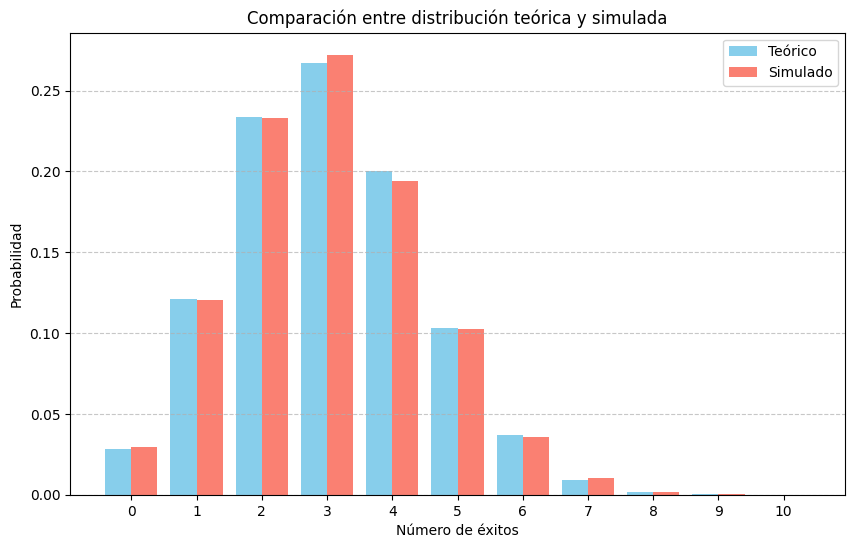

In [ ]:
#Gráfico
import numpy as np
import matplotlib.pyplot as plt

n = 10

x = np.arange(0, n+1) #Posibles valores

probs_simuladas = np.zeros(n+1) #Relleno posiciones con zeros

for valor, freq in results_ITX_Bin['distribution'].items():
    probs_simuladas[int(valor)] = freq

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, prob_teoricas, width=0.4, label='Teórico', color='skyblue')
plt.bar(x + 0.2, probs_simuladas, width=0.4, label='Simulado', color='salmon')
plt.xlabel('Número de éxitos')
plt.ylabel('Probabilidad')
plt.title('Comparación entre distribución teórica y simulada')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Tushé 🫵😎

---
## Ejercicio 6

In [1]:
#Método de la transformada inversa optimizado
from random import random
problem_probs = [0.35, 0.20, 0.20, 0.15, 0.10]
opt_cum_probs = [0.35, 0.55, 0.75, 0.90, 1.0]
opt_values = [3, 1, 4, 0, 1]

def ITX_optimized() -> tuple:
    """
    Versión optimizada de ITX() con condiciones ordenadas por prob. descendente

    Returns:
        tuple: (Número entre 0 y 4, iteraciones hasta salir)
    """
    U = random()
    iterations = 0
    for i in range(5):
        iterations += 1
        if U < opt_cum_probs[i]:
            return opt_values[i], iterations
    return 1, iterations

In [ ]:
from scipy.stats import binom
#Método de aceptación y rechazo con una variable binomial de soporte

def RMX_Bin(n:int, p:float)-> tuple:
    """
    Método de rechazo

    Returns:
        int: Número aleatorio entre 0 y 4
    """
    iterations = 0
    while True:
        iterations += 1
        #Simulo Y
        y = ITX_Bin(n=n, p=p)[0] 
        q_Y = binom.pmf(y, n, p)
        c = max(problem_probs)/q_Y
        U = random()
        if U < problem_probs[y-1] / (c * q_Y): #Definimos q_Y = 0.1 para todo j
            return y, iterations

In [16]:
#Imprimir resultados

def print_results(name, results):
    print("-" * 50)
    print(f"Resultados para {name}:")
    print(f"  - Tiempo total: {results['time']:.6f} segundos")
    print(f"  - Iteraciones totales: {results['total_iter']}")
    print(f"  - Iteraciones promedio: {results['avg_iter']:.4f}")
    print("-" * 50)


In [19]:
results_ITX_OPT = compare_methods(lambda: ITX_optimized(), Nsim=10000)
#Imprimir resultados
print_results("Transformada inversa optimizada:", results_ITX_OPT)

--------------------------------------------------
Resultados para Transformada inversa optimizada::
  - Tiempo total: 0.006002 segundos
  - Iteraciones totales: 24256
  - Iteraciones promedio: 2.4256
--------------------------------------------------


In [20]:
results_ITX_Bin = compare_methods(lambda: RMX_Bin(n=5, p=0.45), Nsim=10000)
#Imprimir resultados
print_results("Rechazo con Binomial:", results_ITX_Bin)

--------------------------------------------------
Resultados para Rechazo con Binomial::
  - Tiempo total: 1.157073 segundos
  - Iteraciones totales: 15928
  - Iteraciones promedio: 1.5928
--------------------------------------------------


Resultados 😃
| Método              | Tiempo total (s) | Iteraciones totales | Iteraciones promedio |
|---------------------|------------------|----------------------|-----------------------|
| ITX Optimizado      | 0.006002         | 24256                | 2.4256                |
| RMX BINOMIAL con C ÓPTIMO        | 1.157073         | 15928                | 1.5928                |
